# Birdseye CNN
Matrikelnr. 5504890

The goal of the project is to extract the birds-eye view (BEV) from the imagery of car cameras.
Specifically, we want to distinguish between drivable sections (roads) and non-drivable sections (houses, pavements, etc.).

In detail, a set of input images is mapped to a BEV of the situation [1], in the following image the more difficult task includes not only identifying rode segments but also objects:
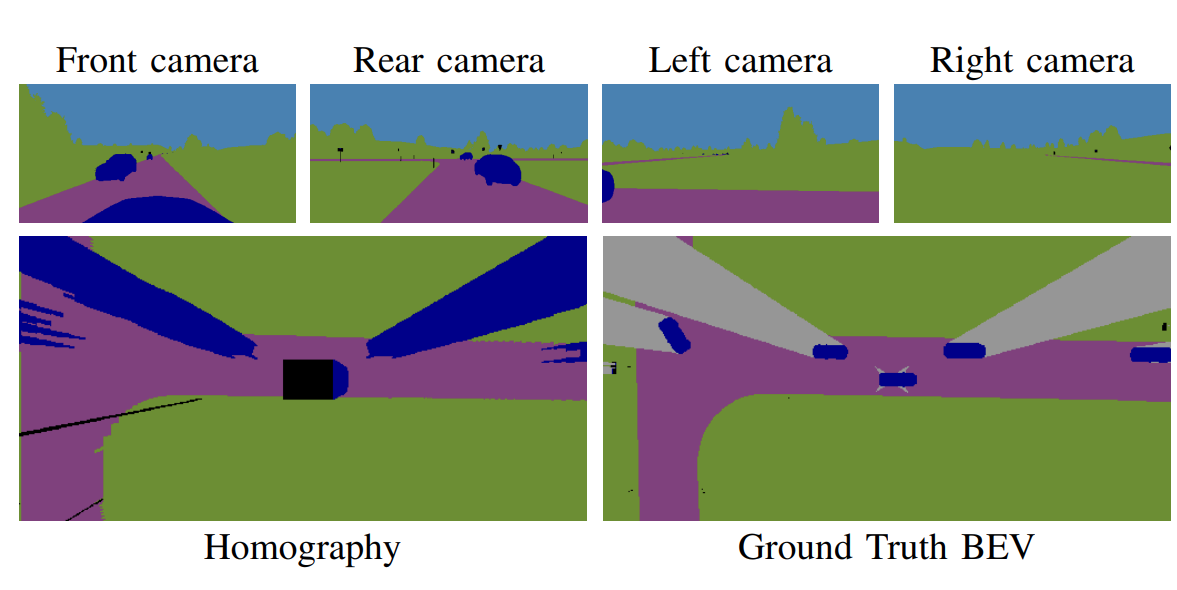
#

## Motivation
The BEV can enable self-driving cars to plan ahead, as they allow for a more accurate representation of surrounding objects.
Multiple approaches to computing the BEV exist [2]. These inlcude:
- Inverse perspective mapping. Using homography, with IPM, the surface is assumed to be planar. With knowledge of the camera angle, one can remap the situation to a BEV. Drawbacks include distortion (because an horizontal plane is assumed) and low precision for objects further away from the image, as they are represented by less pixels in the original image[3]:
  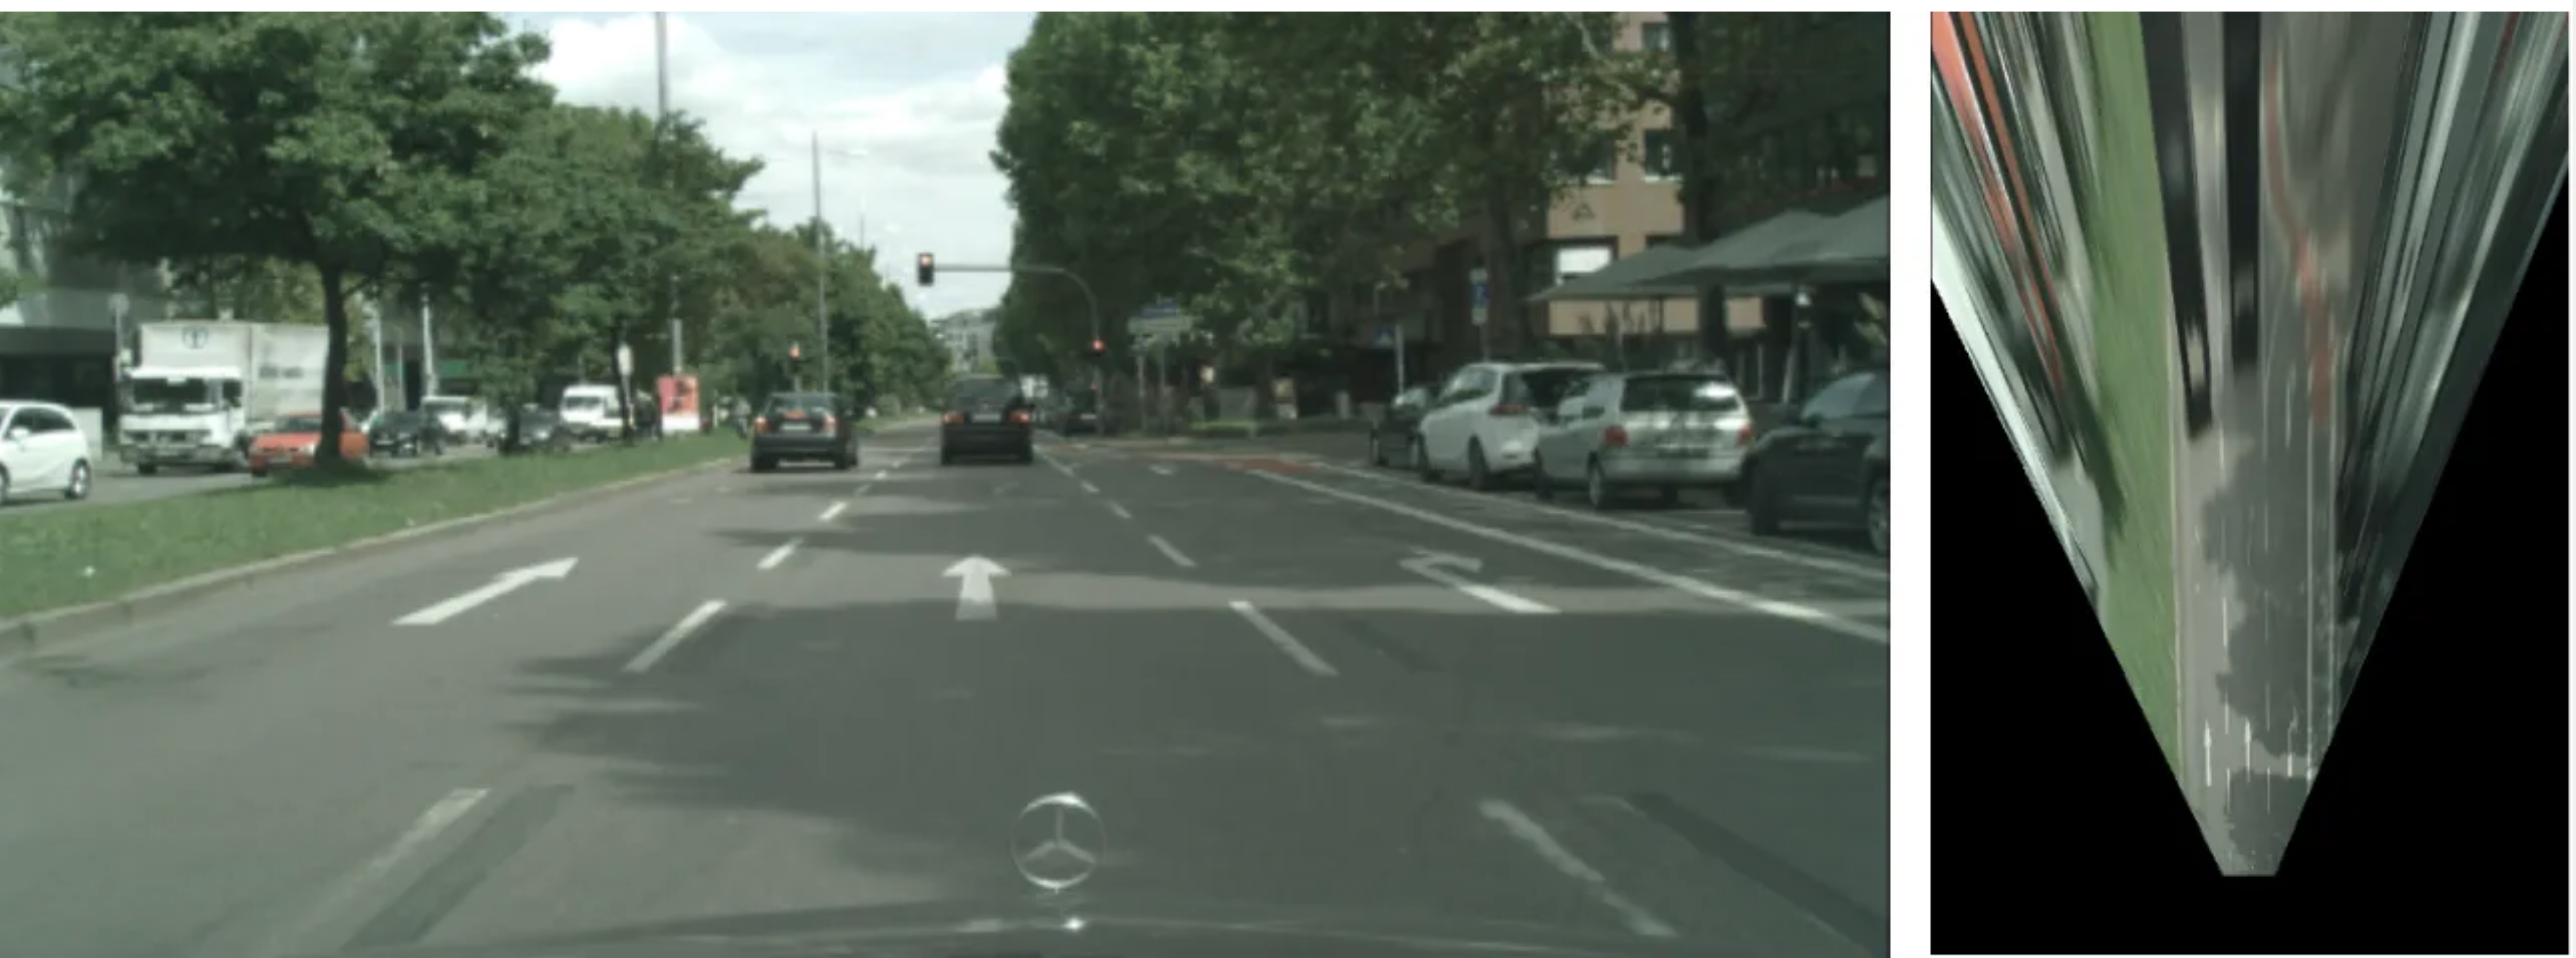

- The surrounding environment can be reconstructed by using lidar sensors.
- Vision based neural networks can be trained in conjunction with labeled BEVs.




# Methodology

- The dataset is constructed with the help of google maps and the street view feature.
- A cnn is trained to construct the birds eye view with the help of the (street-view, maps BEV) pairs.


[1] https://ieeexplore.ieee.org/document/9294462 <br>
[2] https://www.youtube.com/watch?v=TzXuwt56a0E <br>
[3] https://towardsdatascience.com/a-hands-on-application-of-homography-ipm-18d9e47c152f

## Dataset


The dataset is assembled using the standard google street view interface. Buttons are hidden and the bottom left BEV map is expanded:
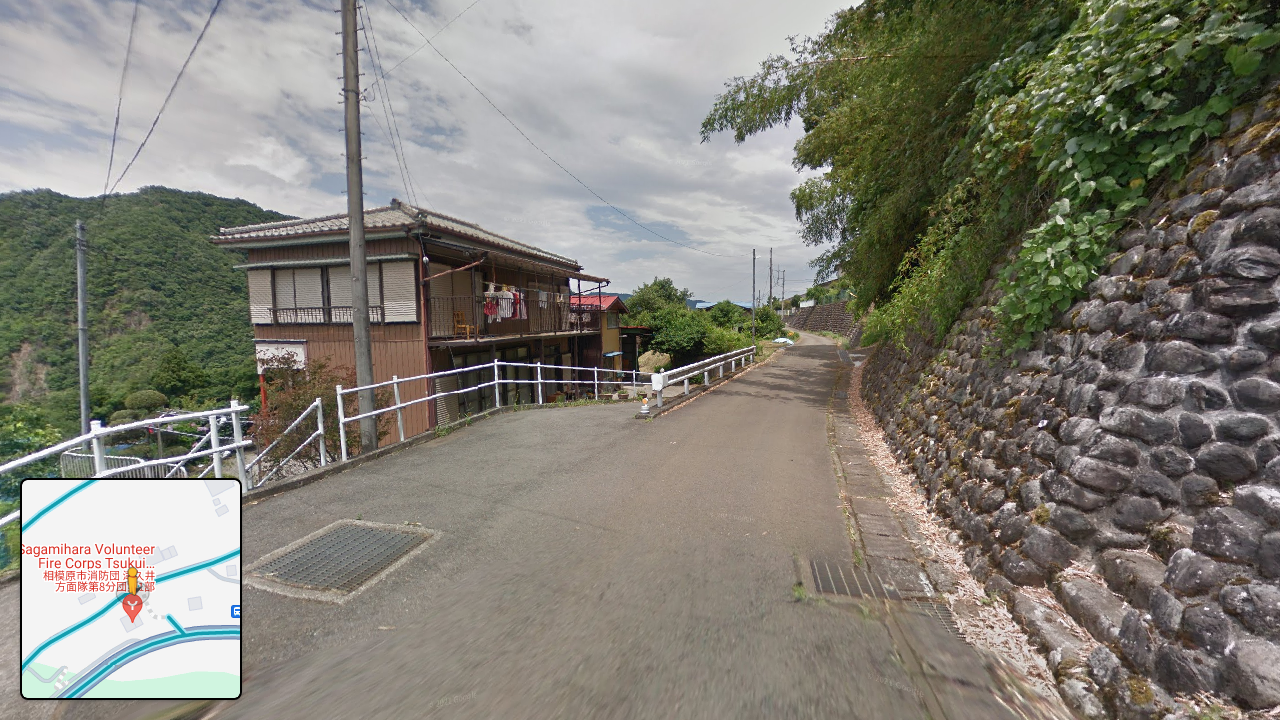

The orientation of the mannequin is used to find the correct rotation of the BEV. Unfortunately, the BEV is always fixed to north, not oriented the way, the street-view is facing.
Open cv can help to trace out the blue-colored road (drivable/walkable) and calculate one of the possible "forward directions" such that the street-view can be adjusted into one of those directions.

A simpler solution would be to always orient the datset samples to the north, such that the BEV-street-view orientations need no re-orientation. But this would only insufficently resemble the view of an autonomous vehicle. 

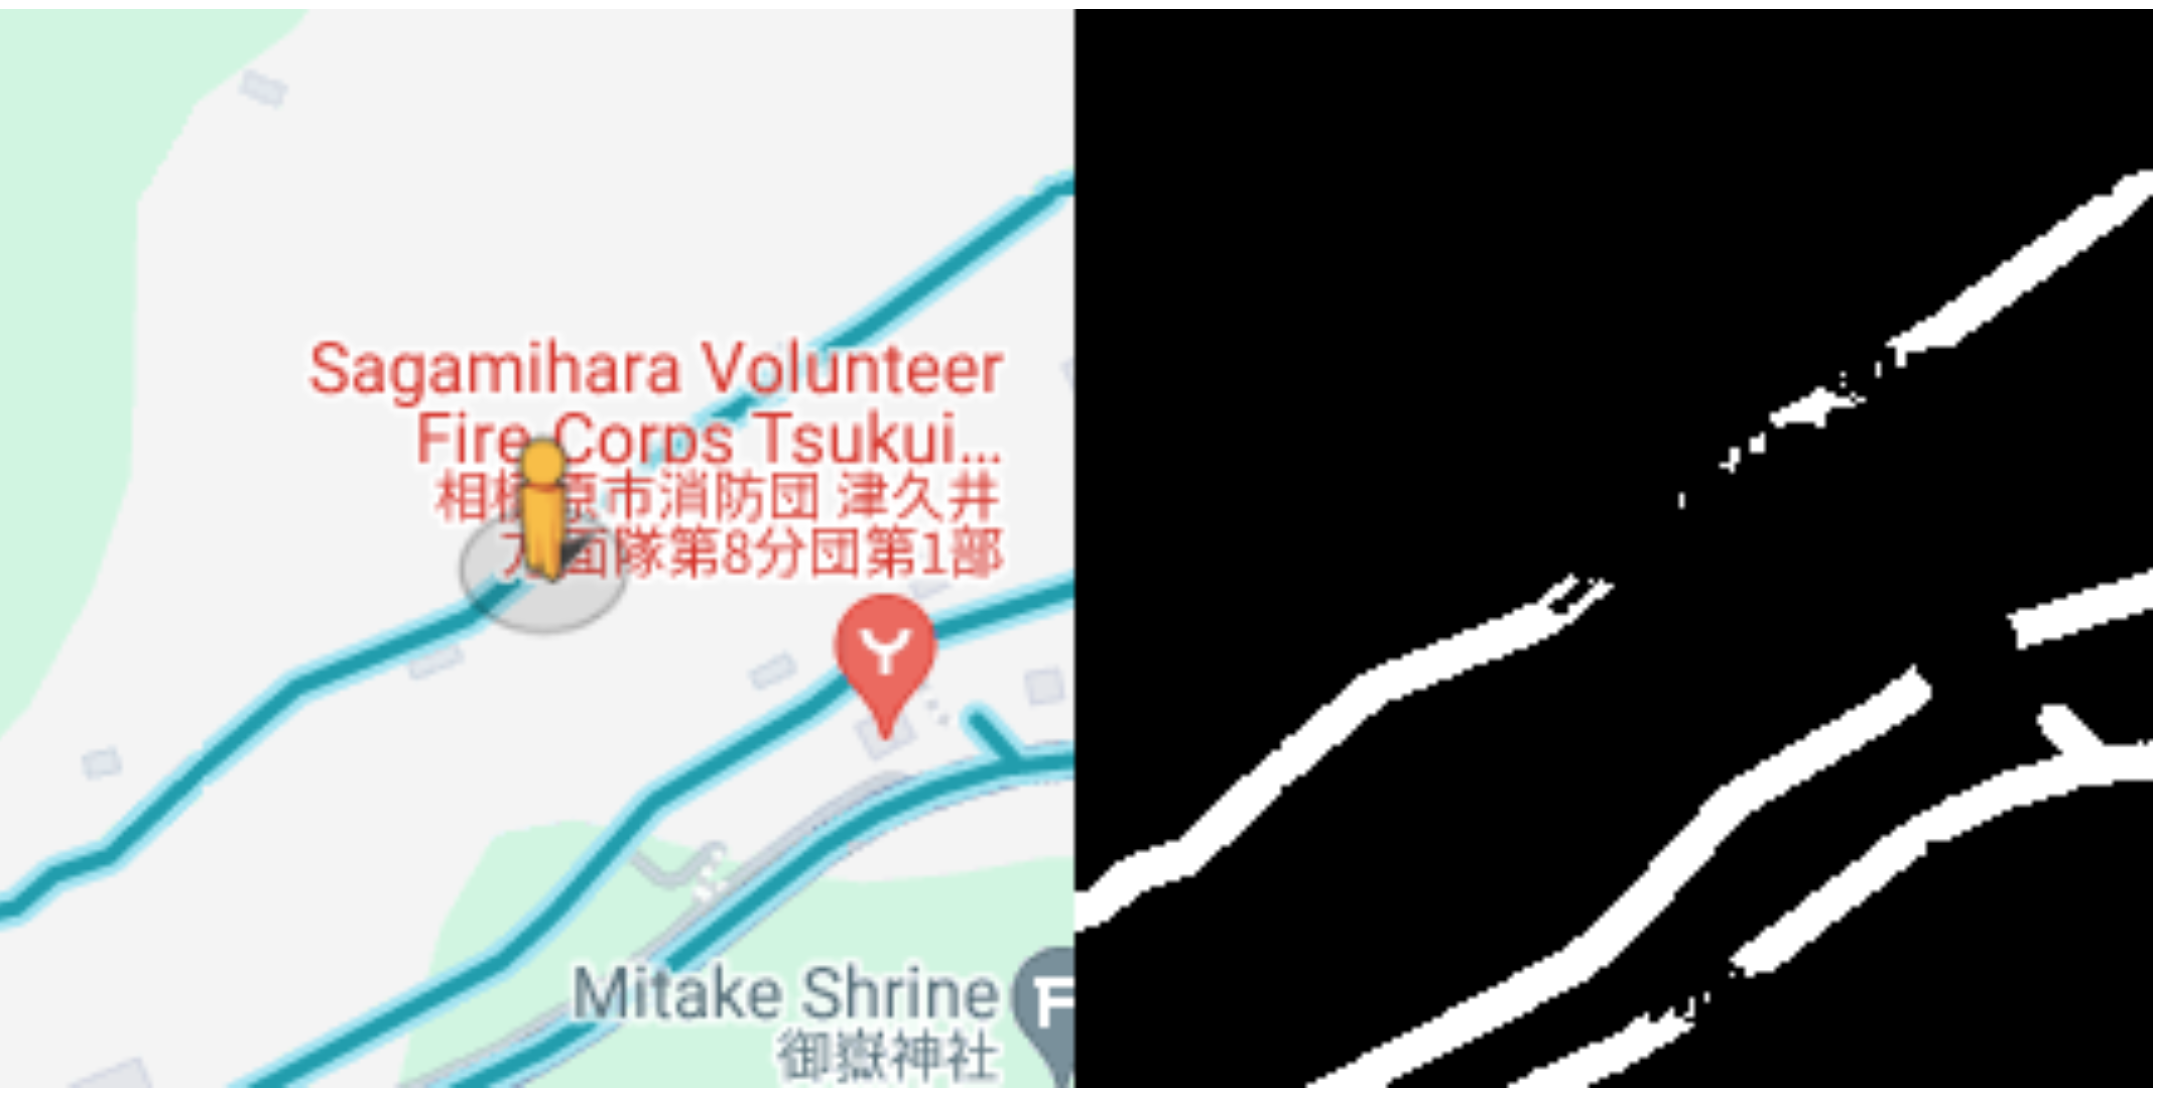

One problem is that road segments are not connected correctly, since text or symbols occlude the road sometimes. There is manual methods using open cv to alleviate the problem. However the task in non-trivial as it involves detecting the angles of segments and connecting only   <br>
The method involves generating random

In [1]:

import cv2
import numpy as np

def get_minimap(img):
    x, y, width, height = 24, 482, 214, 214
    minimap = img[y:y + height, x:x + width]
    return minimap

def trace_walkable_sections(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img = get_minimap(img)
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for blue color (you may need to adjust these values)
    lower_blue = np.array([76, 49, 168])
    upper_blue = np.array([98, 246, 247])

    # Thresholding to get binary image
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    

    # Optional: Apply morphological operations for noise reduction
    #kernel = np.ones((5, 5), np.uint8)
    #mask = cv2.erode(mask, kernel, iterations=1)
    #mask = cv2.dilate(mask, kernel, iterations=1)

    # Find contours
    #contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a blank image
    #result = np.zeros_like(img)
    result = cv2.bitwise_and(img, img, mask=mask)
    result[np.where((result != [0,0,0]).all(axis = 2))] = [255,255,255]
    gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)


    
    # side_by_side = np.hstack((img, gray))
    cv2.imshow("Side by Side", gray)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
trace_walkable_sections('google_maps2.png')